# Principal Component Analysis on the Iris Dataset

## By Christopher Hauman
<br>

#### This guide will explain the basics of using principal component analysis to decrease the dimensionality of your model. The key to PCA is reducing a model to only include the features which have high variance. We first decorrelate the data so we can get see which features have high variance, then we reduce the dimensionality of the model to only include those features. You can read more about PCA and see some great visuals [here](http://setosa.io/ev/principal-component-analysis/). This falls under the umbrella of unsupervised machine learning. If you're unfamiliar with this topic, you can learn the basics in my guide on [K-Means Classification on the Iris Dataset with scikit-learnu](https://nbviewer.jupyter.org/github/chrisman1015/Unsupervised-Learning/blob/master/K-Means%20Classification%20on%20the%20Iris%20Dataset%20with%20scikit-learn/K-Means%20Classification%20on%20the%20Iris%20Dataset%20with%20scikit-learn.ipynb).

### Note: This assumes you have basic knowledge of python data science basics. If you don't, or encounter something you're not familiar with, don't worry! You can get a crash course in my guide, [Cleaning MLB Statcast Data using pandas DataFrames and seaborn Visualization](https://nbviewer.jupyter.org/github/chrisman1015/Cleaning-Statcast-Data/blob/master/Cleaning%20Statcast%20Data/Cleaning%20Statcast%20Data.ipynb).
<br>

Similar to our other projects, we'll import the PCA machine learning algorithm from sklearn. We'll also import pearsonr so we can compute the [Pearson Correlation Coefficient](http://onlinestatbook.com/2/describing_bivariate_data/pearson.html) on our data for illustration. First, let's import the data as usual:

In [233]:
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

In [234]:
# import packages

# datasets has the Iris dataset
from sklearn import datasets

# pandas and numPy for DataFrames and arrays
import pandas as pd
import numpy as np

# pyplot and seaborn for plots
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# load dataset
iris = datasets.load_iris()

In [236]:
# load the data and target values
X, y = iris.data, iris.target

# create DataFrame with iris data
df = pd.DataFrame(X, columns = iris.feature_names)
df2 = df.copy()

In [237]:
# correctly labeled data
iris_labeled = pd.read_csv("labeled_iris.csv", index_col=0)
iris_labeled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Decorrelation is the First Step in PCA

PCA rotates data to be aligned with the axes and shifts them so their mean is 0. This results in decorrelation of the data. We'll demonstrate this by first plotting two of our variables, petal length and width.

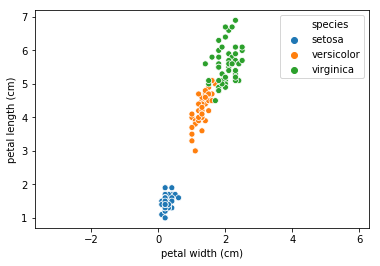

In [178]:
petals_df = iris_labeled[['petal length (cm)', 'petal width (cm)', 'species']]
# Scatter plot width vs length
sns.scatterplot('petal width (cm)','petal length (cm)', hue='species',data=petals_df)
plt.axis('equal')
plt.show()

We can use [Pearson correlation](http://onlinestatbook.com/2/describing_bivariate_data/pearson.html) to get the correlation between sepal length and width.

In [179]:
# Calculate the Pearson correlation
correlation, pvalue = pearsonr(petals_df['petal width (cm)'], petals_df['petal length (cm)'])

# Display the correlation
print(correlation)

0.9628654314027961


We see that the petal width and length have an extremely high correlation.
<br>

We'll now drop the species from the DataFrame so our algorithm doesn't have access to it. We'll also convert it to a numPy array as always for machine learning:

In [182]:
petals_array =  np.array(petals_df.drop('species', axis=1))

Now let's run the PCA algorithm on the petals_df and see what happens:

In [183]:
model = PCA()

pca_features = model.fit_transform(petals_array)

pca_features should have transformed the petal length and width values to be along the x and y axes, with 0 correlation. Let's plot the values and add back in the iris species to see how the plot looks now:

(-2, 2)

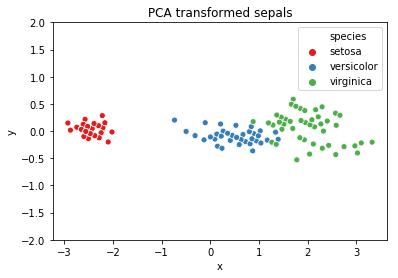

In [188]:
# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]


df_transformed = pd.DataFrame(pca_features)
df_transformed.columns = ['x', 'y']
df_transformed['species'] = iris_labeled['species']

sns.scatterplot(x='x', y='y', data=df_transformed, hue='species',palette="Set1")
plt.title("PCA transformed sepals")
plt.ylim(-2,2)

The data is now transformed to lie perfectly along the x and y axes. Let's see if it's decorrelated as well:

In [187]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

-6.563432013965464e-17


We see the PCA algorithms transformed the data so the two variables are no longer correlated. With this, we can now perform dimension reduction:

### The Second Step in PCA is Dimension Reduction

The intrinsic dimension of a dataset is the minimum number of dimensions required to effectively model the data.
<br>

To find the intrinsic dimension of the iris data, we need to run the PCA algorithm on all the data. As we have in other guides, we'll standardize our data first with StandardScaler. Remember that StandardScaler normalizes features by removing the mean and scaling to unit variance. We'll build our model and fit it to the iris data (X).

In [197]:
# fit pca model to the entire dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(np.array(X))
features = range(pca.n_components_)

We can now use the explained variance of the model features (the scaled variances without correlation) to see which features are components of the intrinsic dimension. Remember, we only want to include the features with significant variance, as those features will be much more telling when using the model. Features with very small variance are generally noise.

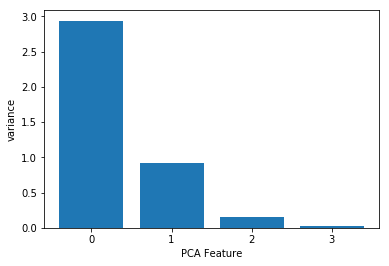

In [198]:
# plot features vs variance
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA Feature')
plt.show()

The intrinsic dimension is the number of PCA features with significant variance. In this case, only the first two dimensions have significant variance, so the intrinsic dimension is two. This means we could effectively model this entire dataset using only two dimensions instead of the usual 4!

Now that we know the intrinsic dimension of the data, we'll use the PCA algorithm once more to reduce the dimensionality of the data.

In [199]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(X)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X)

# Print the shape of pca_features
print(pca_features.shape)

(150, 2)


We see the output is the same size as the original dataset, with only half the features. But how well does this actually represent the data? Let's add the Iris species into PCA reduced data and plot it:

[]

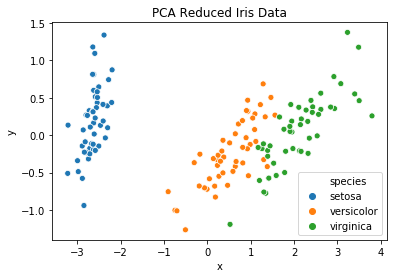

In [201]:
iris_2d = pd.DataFrame(pca_features)
iris_2d.columns = ['x','y']
iris_2d['species'] = iris_labeled['species']

sns.scatterplot(x='x', y='y',data=iris_2d, hue='species')
plt.title("PCA Reduced Iris Data")
plt.plot()

This demonstrates the incredibly power of the PCA algorithm. With only half the features, the model is still able to draw clear distinctions between the Iris Data.
***

Unfortunately, sometimes it's difficult to tell what the intrinsic dimension is. To illustrate this, we'll print the PCA feature barplots for the individual species of Iris:

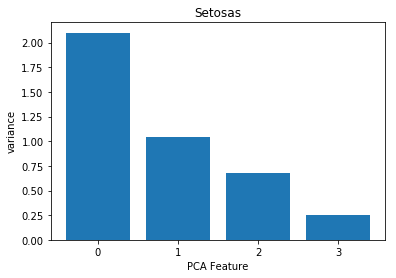

In [227]:
# get numpy array for just setosas
setosas = np.array(iris_labeled[iris_labeled['species'] == 'setosa'].drop('species', axis = 1))

#fit model for setosas
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(setosas)
features = range(pca.n_components_)

# plot features vs variance
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA Feature')
plt.title('Setosas')
plt.show()

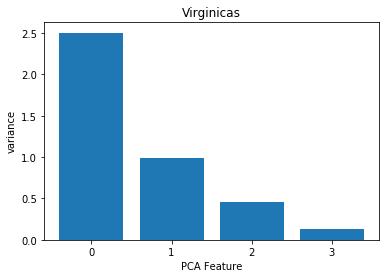

In [225]:
# get array of only versicolors
versicolors = np.array(iris_labeled[iris_labeled['species'] == 'versicolor'].drop('species', axis = 1))

# fit versicolor model
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(virginicas)
features = range(pca.n_components_)

# plot features vs variance
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA Feature')
plt.title('Virginicas')
plt.show()

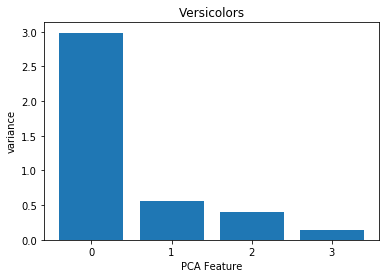

In [226]:
# get array of just virginicas
virginicas = np.array(iris_labeled[iris_labeled['species'] == 'virginica'].drop('species', axis = 1))

# fit virginicas model
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(versicolors)
features = range(pca.n_components_)

# plot features vs variance
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA Feature')
plt.title('Versicolors')
plt.show()

For the setosas, what should the intrinsic dimension be? 1? 2? 3? 4? 
<br>

When we don't have a clear drop in variance, we need to keep every feature. On the contrary, we see a much larger drop for Versicolors, which can be modeled in a single dimension!
***
That does it for this guide. Thanks for reading, and please email me at christopherhauman@gmail.com if you have any questions or feedback.